In [2]:
import pandas as pd
import numpy as np
# import umap
df = pd.read_csv('../api_fetcher/cleaned_abstracts.csv')
df

,abstracts
0,We modulated a solvent-mediated adduct for one...
1,The device performance is enhanced by doping a...
2,Lead halide perovskites have emerged as succes...
3,Several applications of perovskite solar cells...
4,High temperature stable inorganic CsPbX3 (X: I...
...,...
3364,Resonant semiconductor nanoparticles (NPs) tha...
3365,A rutile TiO2 nanodendrite array (3D-RTNDA) co...
3366,A perovskite solar cell with an inverted p–i–n...
3367,"Fullerene derivatives, especially after purpos..."


In [54]:
import torch 

if torch.cuda.is_available():
    print("GPi")

In [35]:
df.shape

(3369, 1)

In [56]:
# embedding = np.load("stella_encoded_data.npy")
embedding = np.load("encoded_data.npy")

embedding.shape

(3369, 768)

In [57]:
embedding[0]

array([-3.76719958e-03, -6.98114862e-04,  2.73002181e-02, -3.67078520e-02,
       -2.80976091e-02,  2.34481748e-02,  1.14310589e-02, -1.71464086e-02,
        7.82184526e-02,  2.15133224e-02, -1.46308830e-02, -1.20545586e-03,
        1.77699998e-02,  3.73778865e-02, -3.14273611e-02,  5.30981980e-02,
        3.50253321e-02,  8.15789681e-03,  7.74166211e-02,  3.62291653e-03,
        2.04845984e-02,  5.16646504e-02, -2.76101418e-02,  4.52127913e-03,
       -3.44165564e-02,  4.15885337e-02, -1.98337696e-02, -1.86499860e-02,
       -5.71322208e-03, -7.41963508e-03,  2.42878422e-02, -1.38181436e-03,
        4.71143937e-03, -7.50954002e-02,  1.68167639e-06, -1.95859801e-02,
       -1.23446984e-02,  1.23168342e-02,  3.40084592e-03,  2.40376554e-02,
       -4.06663083e-02,  2.32100710e-02, -5.94897307e-02,  3.33933569e-02,
       -6.99216314e-03, -1.64144132e-02,  2.88663283e-02,  9.36617777e-02,
       -3.49329598e-02, -1.84189845e-02,  1.90755085e-03, -1.40358042e-03,
        1.05510674e-01,  

In [37]:
# remeber that the best so far was 55 
reducer = umap.UMAP(n_components=55,random_state=42)
reduced_data  = reducer.fit_transform(embedding)


/home/sjamshidi/.local/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [38]:
embedding.shape

(3369, 1024)

In [39]:
reduced_data.shape

(3369, 55)

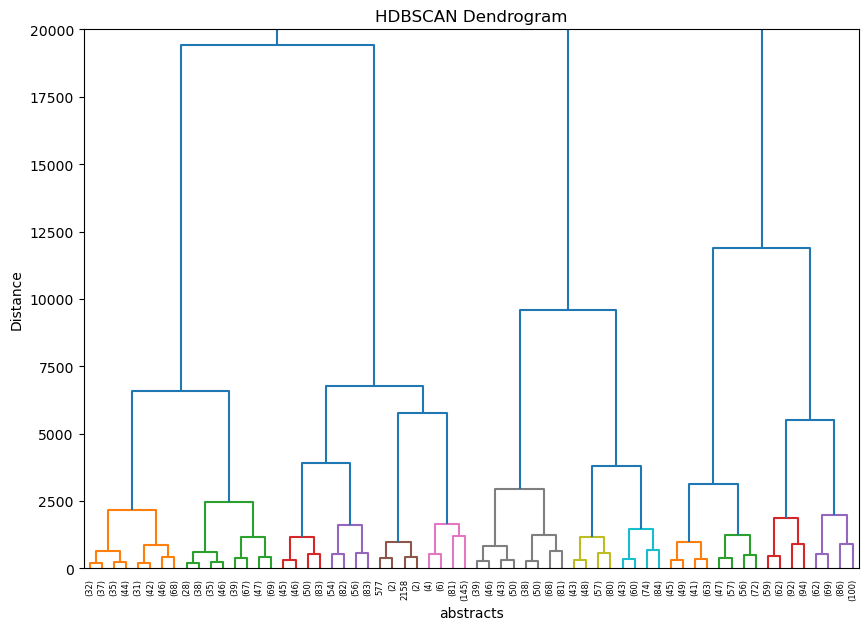

In [40]:
import hdbscan
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

clusterer = hdbscan.HDBSCAN(min_cluster_size=35, gen_min_span_tree=True)
cluster_labels = clusterer.fit_predict(reduced_data)

 
linkage_matrix = linkage(clusterer.condensed_tree_.to_pandas(), method='ward')



plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='level', p=5,color_threshold=3000)  
plt.title("HDBSCAN Dendrogram")
plt.xlabel("abstracts")
plt.ylabel("Distance")
plt.ylim(0, 20000)  # This controls the visible distance range
plt.show()

In [41]:
len(np.unique(cluster_labels))
unique, counts = np.unique(cluster_labels, return_counts=True)
unique

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [42]:
dict(zip(unique, counts))

{-1: 1664,
 0: 88,
 1: 82,
 2: 59,
 3: 242,
 4: 88,
 5: 59,
 6: 160,
 7: 66,
 8: 54,
 9: 65,
 10: 262,
 11: 69,
 12: 58,
 13: 72,
 14: 216,
 15: 65}

In [43]:
type(cluster_labels)

numpy.ndarray

<Axes: ylabel='$\\lambda$ value'>

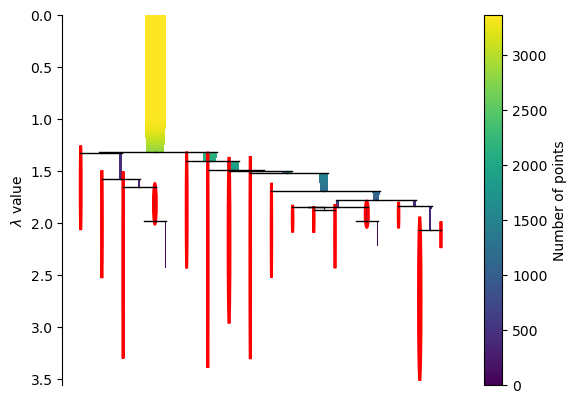

In [44]:
import seaborn as sns
clusterer.condensed_tree_.plot(select_clusters=True)

In [45]:
embedding.shape

(3369, 1024)

Processing UMAP with n_components=10...
(3369, 1024)
{'num_comp': 10, 'num_cluster': 16, 'num_outliers': 1469}


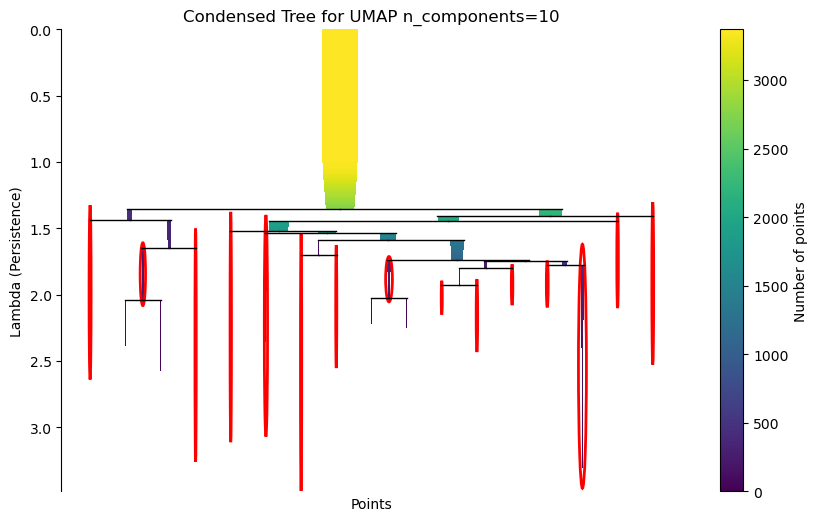

Processing UMAP with n_components=15...
(3369, 1024)
{'num_comp': 15, 'num_cluster': 14, 'num_outliers': 1430}


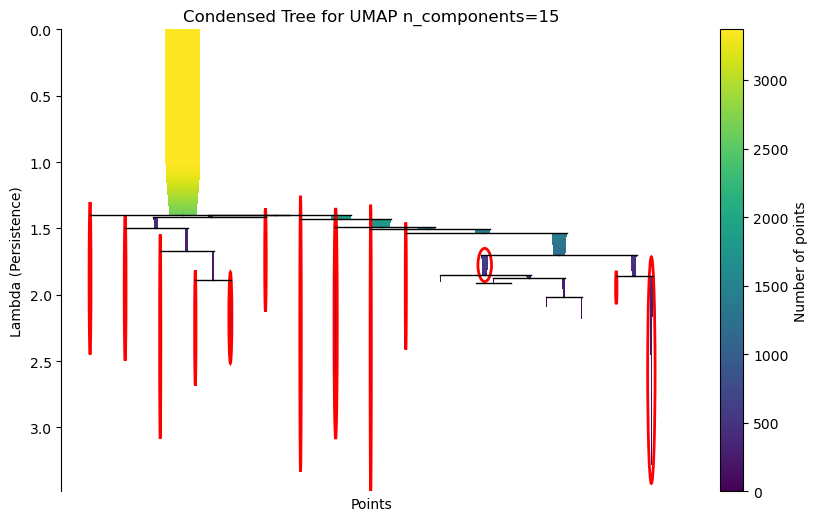

Processing UMAP with n_components=20...
(3369, 1024)
{'num_comp': 20, 'num_cluster': 17, 'num_outliers': 1491}


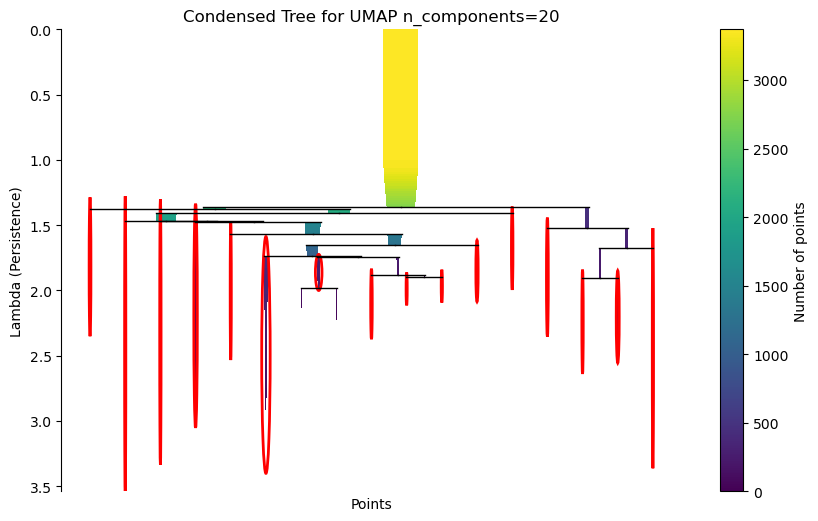

Processing UMAP with n_components=50...
(3369, 1024)
{'num_comp': 50, 'num_cluster': 14, 'num_outliers': 1359}


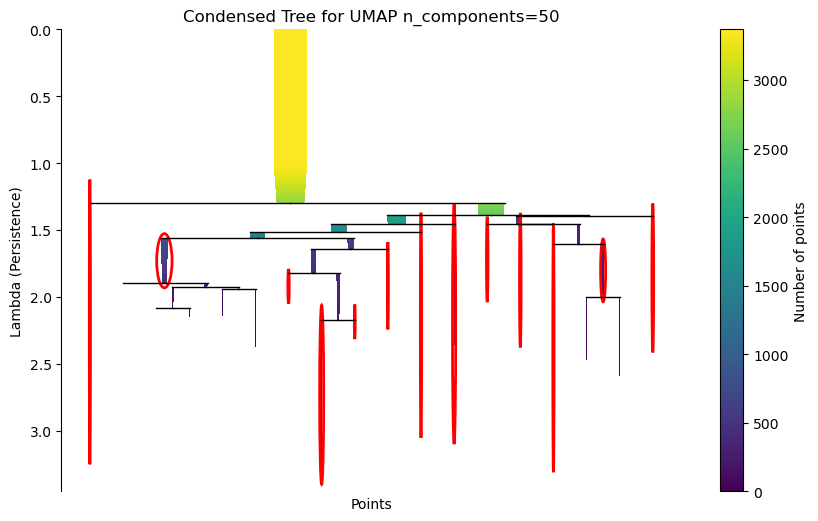

Processing UMAP with n_components=55...
(3369, 1024)
{'num_comp': 55, 'num_cluster': 14, 'num_outliers': 1177}


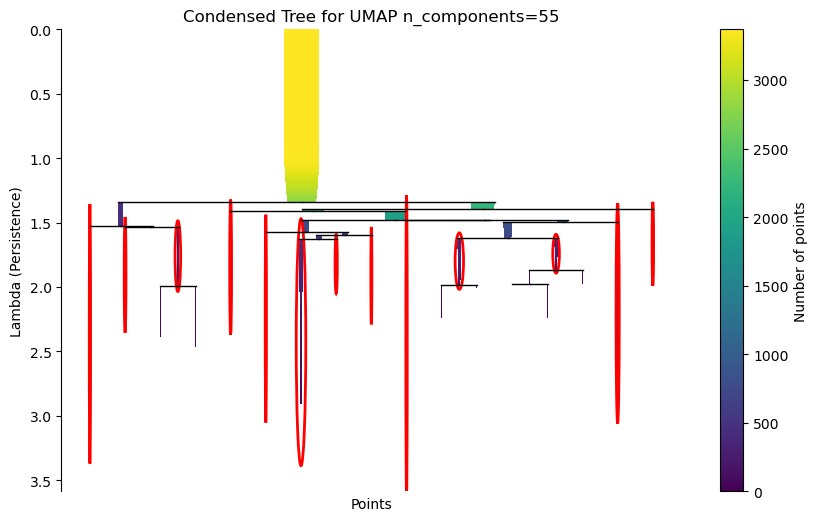

Processing UMAP with n_components=70...
(3369, 1024)
{'num_comp': 70, 'num_cluster': 17, 'num_outliers': 1622}


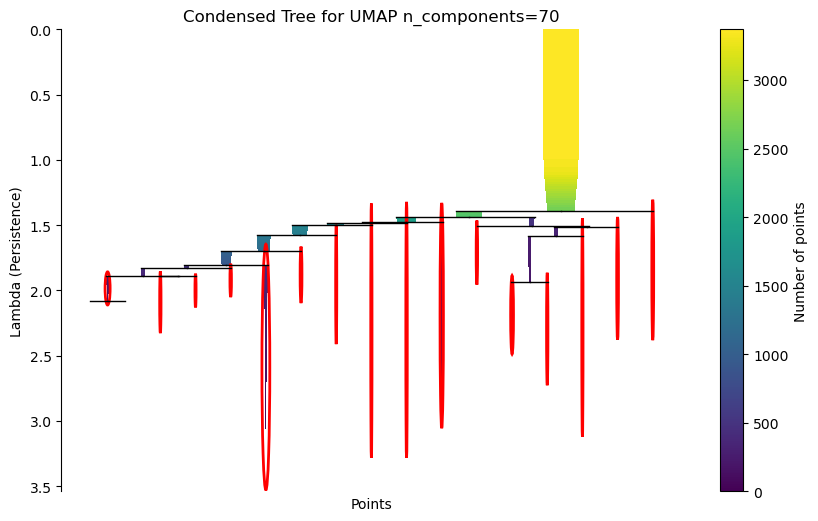

Processing UMAP with n_components=100...
(3369, 1024)
{'num_comp': 100, 'num_cluster': 17, 'num_outliers': 1617}


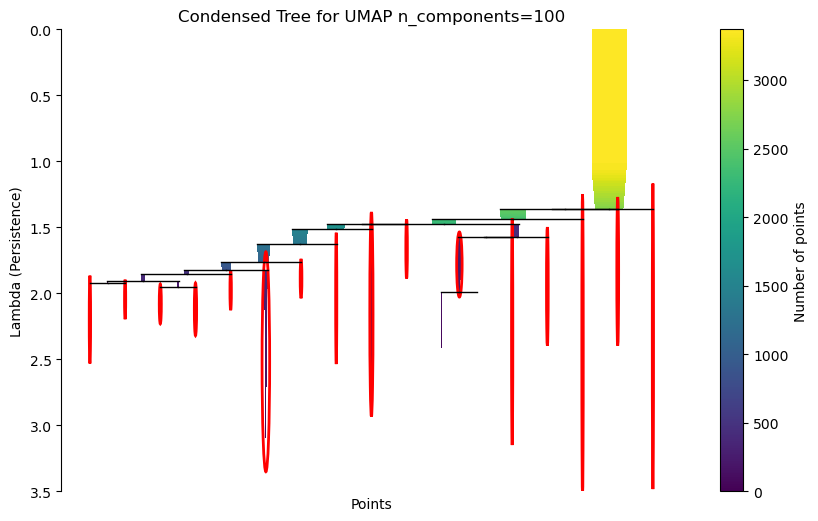

In [46]:
import umap
import hdbscan
import numpy as np
import matplotlib.pyplot as plt



n_components_range = [10,15 ,20, 50,55,70, 100]  
min_cluster_size = 35  
info = []

for n_components in n_components_range:
    print(f"Processing UMAP with n_components={n_components}...")

    reducer = umap.UMAP(n_components=n_components)
    reduced_data = reducer.fit_transform(embedding)
    print(embedding.shape)

    clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, gen_min_span_tree=True)
    cluster_labels = clusterer.fit_predict(reduced_data)
    unique, counts = np.unique(cluster_labels, return_counts=True)
    sub_data = {"num_comp":n_components,"num_cluster":len(unique),"num_outliers":counts[0]}
    info.append(sub_data)
    print(sub_data)
    plt.figure(figsize=(10, 6))
    clusterer.condensed_tree_.plot(select_clusters=True)
    plt.title(f"Condensed Tree for UMAP n_components={n_components}")
    plt.xlabel("Points")
    plt.ylabel("Lambda (Persistence)")
    plt.show()


In [825]:
sentence_embed_result = pd.DataFrame(info)
sentence_embed_result
sentence_embed_result.to_csv("all-mpnet-base-v2_cluster_result.csv")


In [815]:
sentence_embed_result

,num_comp,num_cluster,num_outliers
0,10,17,1611
1,15,14,1336
2,20,16,1368
3,50,14,1396
4,55,14,1273
5,70,17,1580
6,100,16,1562


In [767]:
tree_relation = clusterer.condensed_tree_.to_pandas()

In [768]:
tree_relation

,parent,child,lambda_val,child_size
0,3369,985,0.672806,1
1,3369,1659,0.679187,1
2,3369,1449,0.685800,1
3,3369,1930,0.688850,1
4,3369,1241,0.688935,1
...,...,...,...,...
3398,3400,1562,3.090524,1
3399,3400,2501,3.090524,1
3400,3400,334,3.090524,1
3401,3400,1694,3.090524,1


In [47]:
df["cluster_labels"] = cluster_labels

In [329]:
sample_index = df[df["cluster_labels"] == 3].index.values
sample_index

array([  16,  281,  316,  332,  361,  440,  441,  530,  582,  620,  627,
        631,  641,  701,  796,  829,  842,  876,  882,  906,  974, 1049,
       1057, 1061, 1174, 1450, 1459, 1755, 1760, 1765, 1788, 1790, 1799,
       1842, 1968, 1991, 2032, 2050, 2110, 2201, 2255, 2368, 2455, 2485,
       2581, 2585, 2639, 2753, 2822, 2845, 2878, 2892, 2902, 2931, 3077,
       3096, 3118, 3309, 3325])

In [ ]:
filter_cluster = tree_relation[tree_relation["child"].isin(sample_index)]
filter_cluster
# filter_cluster[filter_cluster["child_size"] > 1 ]

In [1006]:
len(df["cluster_labels"].unique())

18

In [ ]:
tree_relation.loc[filter_cluster.index.values]

In [115]:
unique_clusters = df["cluster_labels"].unique()

In [119]:
whole_part =[]
for i in unique_clusters:
    if i != -1 :
        indexes = df[df["cluster_labels"] == i].index.values
        final = {"id":i,"indexes" :indexes}
        whole_part.append(final)

In [ ]:
whole_part

In [ ]:
for j in whole_part :
    print("cluster_labels",j["id"],"------------------")
    print(tree_relation[(tree_relation["child"].isin(j["indexes"]))])

In [152]:
cluster_parents = tree_relation[tree_relation["child_size"] > 1]
# exactly same amount that we added before to the abstracts 
cluster_parents

,parent,child,lambda_val,child_size
288,3369,3370,2.157882,3022
289,3369,3371,2.157882,59
383,3370,3372,2.206295,65
384,3370,3373,2.206295,2923
390,3373,3374,2.212633,57
391,3373,3375,2.212633,2864
409,3375,3376,2.220369,49
410,3375,3377,2.220369,2810
446,3377,3378,2.235083,64
447,3377,3379,2.235083,2738


In [ ]:
tree_relation[(tree_relation["parent"] == 3380) & (tree_relation["child_size"] > 1)] 

In [615]:
np.unique(cluster_labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18])

In [773]:
# one of the thing is comparing the parent 3370 with parent 3371 
first_clsuter = tree_relation[(tree_relation["parent"] == 3370)]["child"].values


In [774]:
sample_1 = df.loc[first_clsuter].head(10)

In [740]:
tree_relation[(tree_relation["parent"] == 3374) & (tree_relation["child_size"] > 1)] 


,parent,child,lambda_val,child_size


In [779]:
second_cluster = tree_relation[(tree_relation["parent"] == 3374)]["child"].values
sample_2 = df.loc[second_cluster]["abstracts"]
sample_2

886     Replacing copper with heavier palladium (Pd) e...
209     Solution‐processed hole transporting materials...
2982    Copper (II) phthalocyanines (CuPcs) have attra...
2146    Low cost copper phthalocyanine has been used a...
207     A solution-processable copper(ii) phthalocyani...
                              ...                        
1781    Ag/CuO nanofibers (Nfs) with a diameter of 650...
1942    Low-cost inorganic copper iodide (CuI) is intr...
3030    Inorganic-organic metal halide perovskite sola...
1002    An alternative hole transporting material Cu2−...
2615    Organic–inorganic halide perovskite solar cell...
Name: abstracts, Length: 63, dtype: object

In [782]:
third_cluster = tree_relation[(tree_relation["parent"] == 3380)]["child"].values
sample_3 = df.loc[third_cluster]["abstracts"]
sample_3

627     High-efficiency and long-term stable planar pe...
2878    Organometallic halide perovskite solar cells (...
1790    Organometal halide perovskites have powerful i...
3096    Free standing Ni nanobelts dispersed in HTMs w...
582     An industrially compatible in-line coating met...
842     Herein, we demonstrate that lithium and cobalt...
1459    A high‐performing inverted perovskite solar ce...
2581    The organometal halide perovskite (OHP) materi...
974     A new strategy is introduced to fabricate NiOx...
530     The presence of oxygen decreased the energy mi...
2931    We demonstrated highly efficient and stable pe...
1799    Incorporating NiO NTs in perovskite films prov...
641     In perovskite solar cells (PSCs), the interfac...
2822    A solution combustion synthesized hole transpo...
3118    The effect of substitutional Li doping into Ni...
3325    The organic-inorganic hybrid perovskites such ...
332     High‐quality hole transport layers are prepare...
281     A hybr

In [371]:
tree_relation[(tree_relation["parent"] == 3376)]

,parent,child,lambda_val,child_size
1033,3376,450,1.460274,1
1037,3376,2318,1.470727,1
1041,3376,2062,1.472529,1
1045,3376,1363,1.475091,1
1049,3376,3380,1.482203,66
1050,3376,3381,1.482203,343


In [366]:
tree_relation[(tree_relation["parent"] == 3372)]

,parent,child,lambda_val,child_size
827,3372,317,1.395593,1
829,3372,2916,1.395602,1
831,3372,2473,1.395681,1
833,3372,725,1.395739,1
835,3372,900,1.396083,1
...,...,...,...,...
998,3372,559,1.437226,1
999,3372,2044,1.437466,1
1000,3372,3071,1.438660,1
1001,3372,3374,1.438938,1859


In [783]:
sample_1.to_csv("sample_1.csv")
sample_2.to_csv("sample_2.csv")
sample_3.to_csv("sample_3.csv")


In [195]:
df.loc[1669]["abstracts"]

'We exploit the Sn ratio to optimize the band alignment in Pb–Sn mixed triple perovskite solar cells with an inverted structure. '

In [763]:
filter_cluster_labels = df[df["cluster_labels"] != -1]

In [764]:
filter_cluster_labels

,abstracts,cluster_labels
1,The device performance is enhanced by doping a...,0
3,Several applications of perovskite solar cells...,3
4,High temperature stable inorganic CsPbX3 (X: I...,11
6,Electron transport layer (ETL) is a functional...,3
7,A two‐step solution processing approach has be...,10
...,...,...
3363,"In this paper, we fabricated a TiO 2 homogeneo...",3
3365,A rutile TiO2 nanodendrite array (3D-RTNDA) co...,3
3366,A perovskite solar cell with an inverted p–i–n...,2
3367,"Fullerene derivatives, especially after purpos...",2


In [784]:
df


,abstracts,cluster_labels,x,y
0,We modulated a solvent-mediated adduct for one...,-1,10.028035,1.559866
1,The device performance is enhanced by doping a...,0,8.443402,2.915662
2,Lead halide perovskites have emerged as succes...,-1,9.641084,1.657120
3,Several applications of perovskite solar cells...,3,8.757392,0.893506
4,High temperature stable inorganic CsPbX3 (X: I...,11,9.500488,2.223854
...,...,...,...,...
3364,Resonant semiconductor nanoparticles (NPs) tha...,-1,8.926554,0.506709
3365,A rutile TiO2 nanodendrite array (3D-RTNDA) co...,3,8.672011,0.749375
3366,A perovskite solar cell with an inverted p–i–n...,2,7.456290,2.261343
3367,"Fullerene derivatives, especially after purpos...",2,7.115547,1.402918


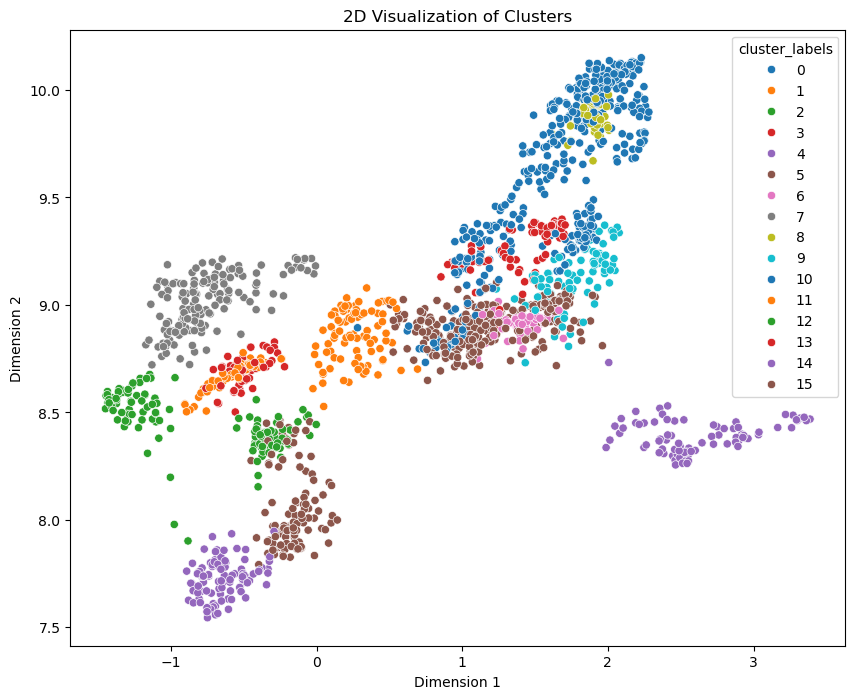

In [50]:

df['x'] = reduced_data[:, 0]  # First dimension of the reduced data
df['y'] = reduced_data[:, 1]  # Second dimension of the reduced data
# Optional: Add a third dimension if needed
filtered_df = df[df['cluster_labels'] != -1]

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='x', 
    y='y', 
    hue='cluster_labels', 
    palette='tab10',  # Change palette as needed
    data=filtered_df, 
    legend="full"
)
plt.title("2D Visualization of Clusters")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

In [821]:
reduced_data.shape


(3369, 50)

In [48]:
filtered_data = reduced_data[cluster_labels != -1]
filtered_labels = cluster_labels[cluster_labels != -1]

In [836]:
filtered_data.shape

(1974, 100)

In [837]:
filtered_labels.shape

(1974,)

In [839]:
reduced_data[cluster_labels]

array([[10.160741  ,  0.7108323 , 10.469145  , ...,  4.496156  ,
         4.367393  ,  5.6433554 ],
       [10.023866  ,  0.97287273, 10.253615  , ...,  4.435979  ,
         4.295858  ,  5.5537486 ],
       [10.160741  ,  0.7108323 , 10.469145  , ...,  4.496156  ,
         4.367393  ,  5.6433554 ],
       ...,
       [10.08546   ,  1.331157  , 11.341335  , ...,  4.5155663 ,
         4.368189  ,  5.553315  ],
       [ 8.505001  ,  0.03637295, 10.773056  , ...,  4.529176  ,
         4.352063  ,  5.388577  ],
       [ 9.2761965 ,  0.84482163, 11.419838  , ...,  4.531528  ,
         4.3217635 ,  5.477868  ]], dtype=float32)

In [840]:
reduced_data

array([[10.023866  ,  0.97287273, 10.253615  , ...,  4.435979  ,
         4.295858  ,  5.5537486 ],
       [ 8.801919  ,  2.5946035 , 11.534768  , ...,  4.5226283 ,
         4.313399  ,  5.552615  ],
       [10.492671  ,  1.2603196 , 10.842545  , ...,  4.492068  ,
         4.363189  ,  5.666123  ],
       ...,
       [ 8.406716  ,  1.697929  , 12.585948  , ...,  4.634293  ,
         4.4427547 ,  5.4723964 ],
       [ 7.6744137 ,  1.2054244 , 11.64144   , ...,  4.524528  ,
         4.36148   ,  5.616036  ],
       [10.160741  ,  0.7108323 , 10.469145  , ...,  4.496156  ,
         4.367393  ,  5.6433554 ]], dtype=float32)

In [848]:
len(reduced_data[cluster_labels == -1])

1395

In [855]:
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable
  Using cached plotly-5.24.1-py3-none-any.whl.metadata (7.3 kB)
  Using cached tenacity-9.0.0-py3-none-any.whl.metadata (1.2 kB)
Using cached plotly-5.24.1-py3-none-any.whl (19.1 MB)
Using cached tenacity-9.0.0-py3-none-any.whl (28 kB)


In [885]:
len(np.unique(cluster_labels))

17

In [1032]:
df['cluster_labels'] = cluster_labels

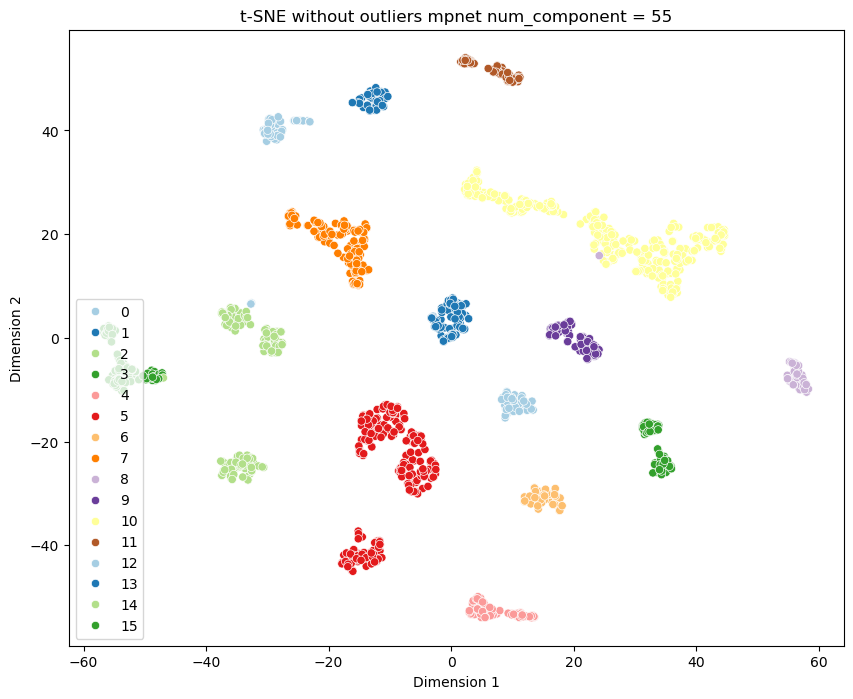

In [52]:
from sklearn.manifold import TSNE
filtered_new_df = df[df['cluster_labels'] != -1]

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
data_2d = tsne.fit_transform(filtered_data)

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=data_2d[:, 0], 
    y=data_2d[:, 1], 
    hue='cluster_labels', 
    palette='Paired',
    data=filtered_new_df, 
    legend="full"
)
plt.title("t-SNE without outliers mpnet num_component = 55")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend(loc="lower left")
plt.show()

In [890]:
df.shape

(3369, 2)

In [983]:
filtered_new_df = df[df['cluster_labels'] != -1]
filtered_new_df

,abstracts,cluster_labels
1,The device performance is enhanced by doping a...,0
4,High temperature stable inorganic CsPbX3 (X: I...,14
6,Electron transport layer (ETL) is a functional...,8
7,A two‐step solution processing approach has be...,16
8,"Using poly(3, 4-ethylenedioxythiophene):polyst...",16
...,...,...
3363,"In this paper, we fabricated a TiO 2 homogeneo...",7
3365,A rutile TiO2 nanodendrite array (3D-RTNDA) co...,7
3366,A perovskite solar cell with an inverted p–i–n...,6
3367,"Fullerene derivatives, especially after purpos...",5


In [1022]:
clustering_stella = df



In [1023]:
clustering_stella.to_csv("clustering_stella.csv")

In [1033]:
clustering_mpnet = df

In [1034]:
clustering_mpnet.to_csv("clustering_mpnet.csv")

In [922]:
len(np.unique(cluster_labels))

9

In [1011]:
clustering_stella

,abstracts,cluster_labels
0,We modulated a solvent-mediated adduct for one...,-1
1,The device performance is enhanced by doping a...,0
2,Lead halide perovskites have emerged as succes...,-1
3,Several applications of perovskite solar cells...,-1
4,High temperature stable inorganic CsPbX3 (X: I...,14
...,...,...
3364,Resonant semiconductor nanoparticles (NPs) tha...,-1
3365,A rutile TiO2 nanodendrite array (3D-RTNDA) co...,7
3366,A perovskite solar cell with an inverted p–i–n...,6
3367,"Fullerene derivatives, especially after purpos...",5


In [1014]:
np.unique(clustering_mpnet["cluster_labels"])

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16])